In [125]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [126]:
citynamelist=["bj","sh","gz","sz","zz"]
citynamelist_chinese=["北京","上海","广州","深圳","郑州"]
df_list=[]

In [127]:
result={}
for i in range(len(citynamelist)):
    #filename="RawData\\"+citynamelist[i]+".csv"
    filename=citynamelist[i]+"2.csv"
    """name_chinese,block,house_type,direct,area,price"""
    df = pd.read_csv(filename, encoding='utf-8-sig')
    df = df.drop_duplicates()  # 去重
    df = df.dropna()  # 去空值
    #输出数据数量
    print(citynamelist_chinese[i]+"的数据数量为：",len(df))
    df_list.append(df)
    



北京的数据数量为： 36478
上海的数据数量为： 27000
广州的数据数量为： 51412
深圳的数据数量为： 21303
郑州的数据数量为： 21796


In [128]:
for i in range(len(citynamelist)):
    result[citynamelist_chinese[i]]={}
    result[citynamelist_chinese[i]]["租金的均价"]=df_list[i]['price'].mean()
    result[citynamelist_chinese[i]]["租金的最高价"]=df_list[i]['price'].max()
    result[citynamelist_chinese[i]]["租金的最低价"]=df_list[i]['price'].min()
    result[citynamelist_chinese[i]]["租金的中位数"]=df_list[i]['price'].median()
    result[citynamelist_chinese[i]]["单位面积租金（元/平米）的均价"]=(df_list[i]['price']/df_list[i]['area'].astype('float64')).mean()
    result[citynamelist_chinese[i]]["单位面积租金（元/平米）的最高价"]=(df_list[i]['price']/df_list[i]['area'].astype('float64')).max()
    result[citynamelist_chinese[i]]["单位面积租金（元/平米）的最低价"]=(df_list[i]['price']/df_list[i]['area'].astype('float64')).min()
    result[citynamelist_chinese[i]]["单位面积租金（元/平米）的中位数"]=(df_list[i]['price']/df_list[i]['area'].astype('float64')).median()
print(result)


{'北京': {'租金的均价': 8213.792559899117, '租金的最高价': 216000, '租金的最低价': 500, '租金的中位数': 6390.0, '单位面积租金（元/平米）的均价': 96.37435170029163, '单位面积租金（元/平米）的最高价': 1098.265895953757, '单位面积租金（元/平米）的最低价': 8.983992159425025, '单位面积租金（元/平米）的中位数': 91.93662453802983}, '上海': {'租金的均价': 7723.664333333333, '租金的最高价': 500000.0, '租金的最低价': 500.0, '租金的中位数': 5600.0, '单位面积租金（元/平米）的均价': 99.52002946038078, '单位面积租金（元/平米）的最高价': 2150.0, '单位面积租金（元/平米）的最低价': 5.882352941176471, '单位面积租金（元/平米）的中位数': 93.16356027846683}, '广州': {'租金的均价': 4314.66321092352, '租金的最高价': 220000.0, '租金的最低价': 80.0, '租金的中位数': 3200.0, '单位面积租金（元/平米）的均价': 55.17642688682587, '单位面积租金（元/平米）的最高价': 774.1311475409836, '单位面积租金（元/平米）的最低价': 0.024453517053670153, '单位面积租金（元/平米）的中位数': 47.61904761904762}, '深圳': {'租金的均价': 7566.694221471154, '租金的最高价': 380000.0, '租金的最低价': 850.0, '租金的中位数': 5500.0, '单位面积租金（元/平米）的均价': 98.93822216538487, '单位面积租金（元/平米）的最高价': 874.4038155802862, '单位面积租金（元/平米）的最低价': 0.05568535354146743, '单位面积租金（元/平米）的中位数': 87.17948717948718}, '郑州': {'租金的均价': 2371.289823

Text(0.5, 1.0, '租金均价')

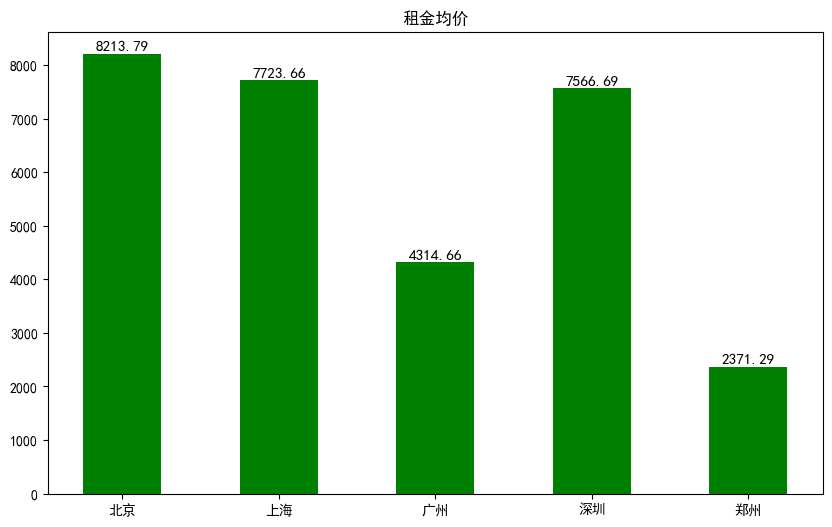

In [129]:
#绘制图形，五个城市的租金的均价、最高价、最低价、中位数
#设置plt的中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
#输出租金均价的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["租金的均价"] for i in result.keys()], width=0.5,color="green")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["租金的均价"] for i in result.keys()]):
    plt.text(a, b+15, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)



plt.title("租金均价")

Text(0.5, 1.0, '租金最高价')

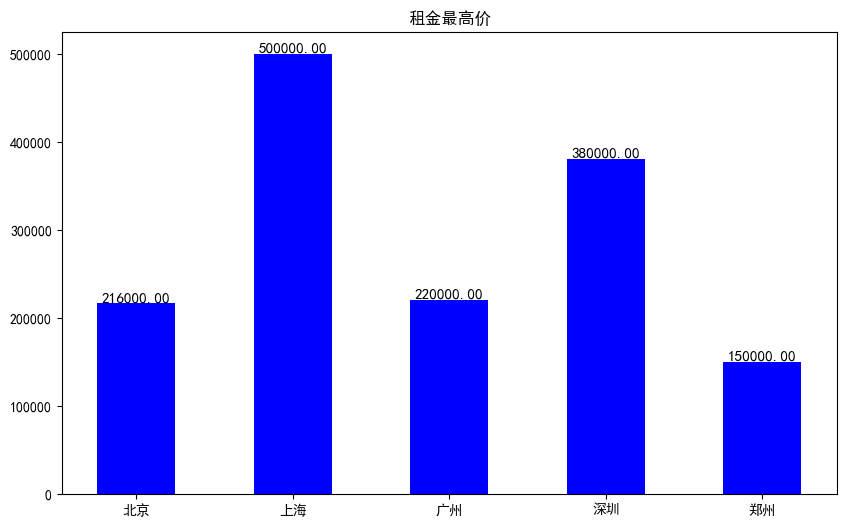

In [130]:
#输出租金最高价的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["租金的最高价"] for i in result.keys()], width=0.5,color="blue")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["租金的最高价"] for i in result.keys()]):
    plt.text(a, b+15, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.title("租金最高价")

Text(0, 0.5, '租金最低价（元）')

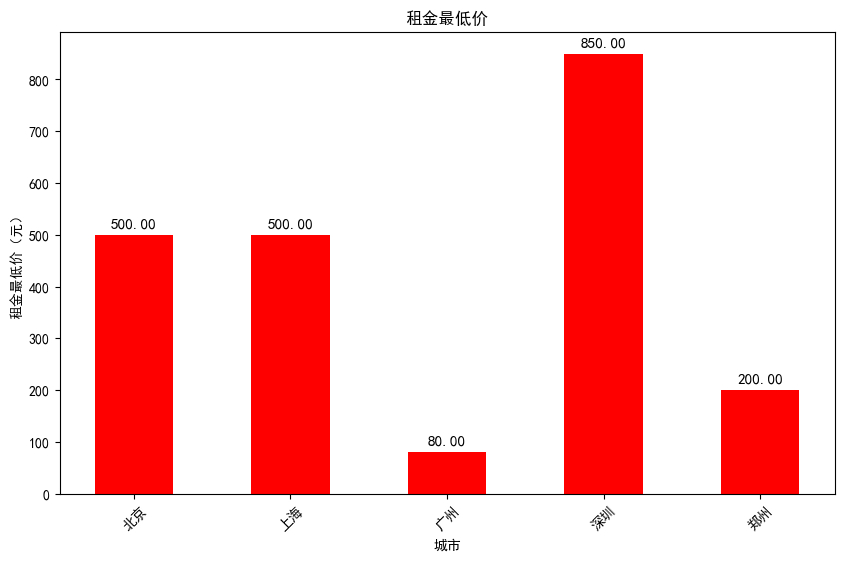

In [131]:

#输出租金最低价的柱状图，进行一些美化

plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["租金的最低价"] for i in result.keys()], width=0.5,color="red")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["租金的最低价"] for i in result.keys()]):
    plt.text(a, b+10, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.title("租金最低价")
#进行一些美化
plt.xticks(rotation=45)
plt.xlabel("城市")
plt.ylabel("租金最低价（元）")
#更改颜色



In [132]:
#输出广州最低租金
print(result["广州"]["租金的最低价"])
print(result["深圳"]["租金的最低价"])

80.0
850.0


Text(0.5, 1.0, '租金中位数')

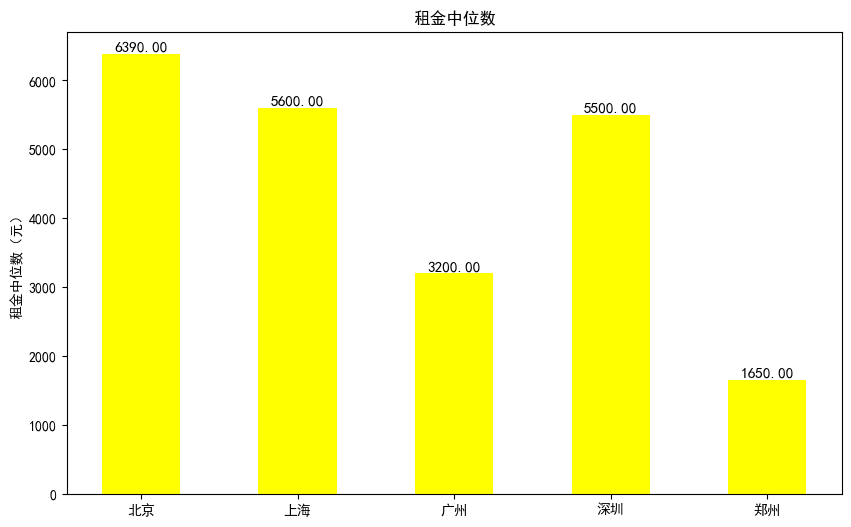

In [133]:

#输出租金中位数的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["租金的中位数"] for i in result.keys()], width=0.5,color="yellow")
for a,b in zip(result.keys(), [result[i]["租金的中位数"] for i in result.keys()]):
    plt.text(a, b+10, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("租金中位数（元）")
plt.title("租金中位数")

Text(0.5, 1.0, '单位面积租金（元/平米）的均价')

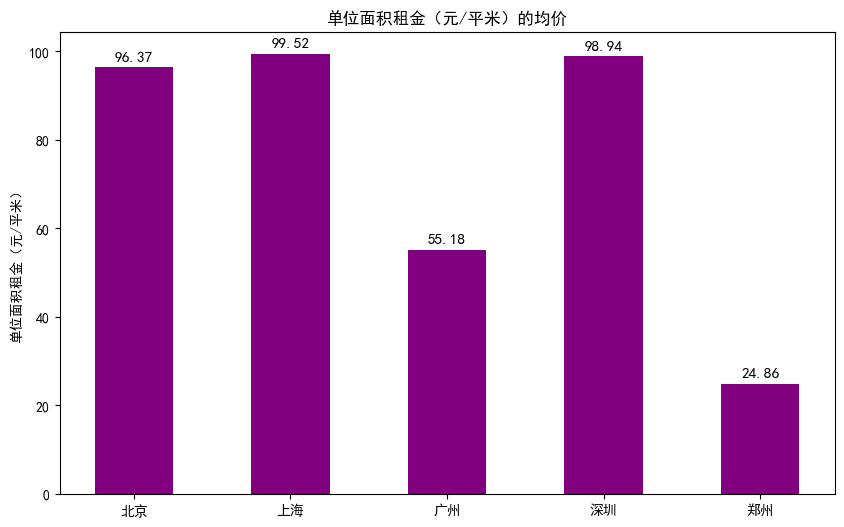

In [134]:

#绘制图形，五个城市的单位面积租金（元/平米）的均价、最高价、最低价、中位数
#输出单位面积租金（元/平米）的均价的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["单位面积租金（元/平米）的均价"] for i in result.keys()], width=0.5,color="purple")
for a,b in zip(result.keys(), [result[i]["单位面积租金（元/平米）的均价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("单位面积租金（元/平米）")
plt.title("单位面积租金（元/平米）的均价")

Text(0.5, 1.0, '单位面积租金（元/平米）的最高价')

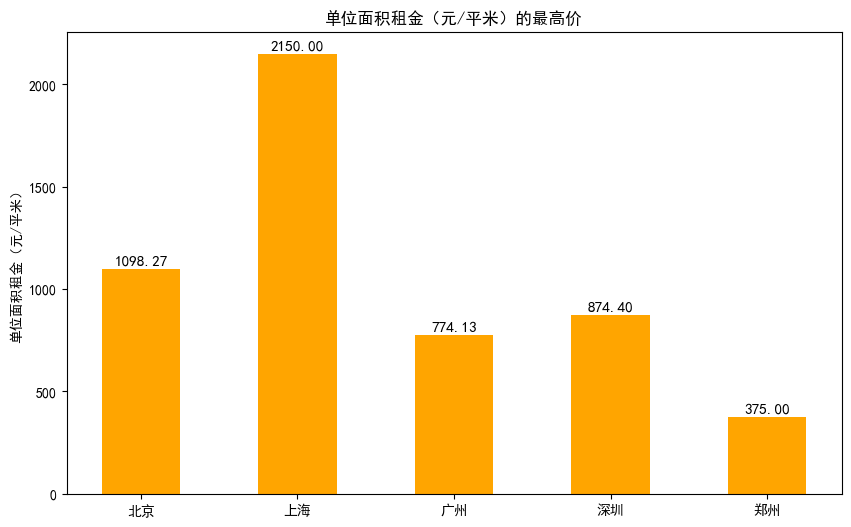

In [135]:

#输出单位面积租金（元/平米）的最高价的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["单位面积租金（元/平米）的最高价"] for i in result.keys()], width=0.5,color="orange")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["单位面积租金（元/平米）的最高价"] for i in result.keys()]):
    plt.text(a, b+10, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("单位面积租金（元/平米）")
plt.title("单位面积租金（元/平米）的最高价")

0.024453517053670153
0.05568535354146743


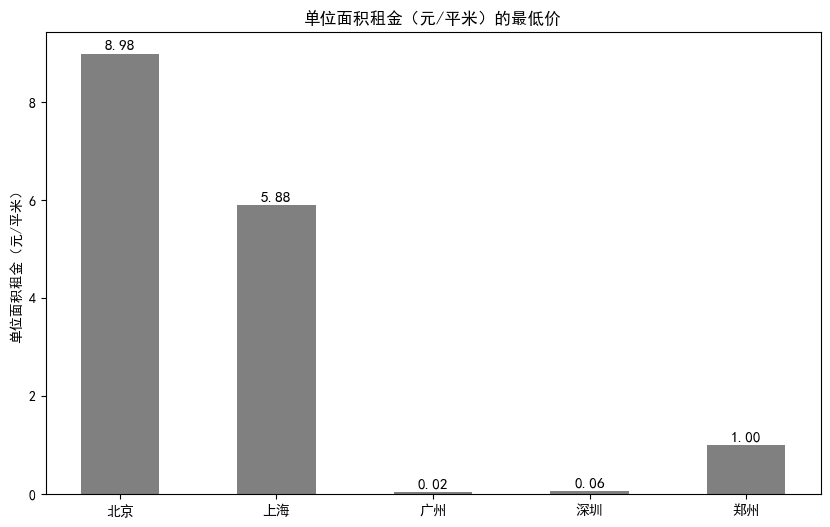

In [136]:

#输出单位面积租金（元/平米）的最低价的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["单位面积租金（元/平米）的最低价"] for i in result.keys()], width=0.5,color="gray")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["单位面积租金（元/平米）的最低价"] for i in result.keys()]):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.title("单位面积租金（元/平米）的最低价")
plt.ylabel("单位面积租金（元/平米）")

print(result["广州"]["单位面积租金（元/平米）的最低价"])
print(result["深圳"]["单位面积租金（元/平米）的最低价"])


Text(0.5, 1.0, '单位面积租金（元/平米）的中位数')

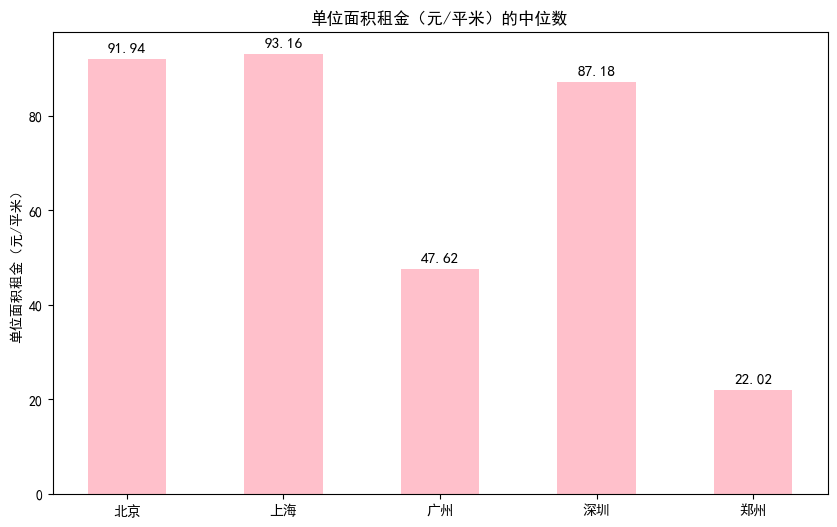

In [137]:

#输出单位面积租金（元/平米）的中位数的柱状图
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), [result[i]["单位面积租金（元/平米）的中位数"] for i in result.keys()], width=0.5,color="pink")
#对每个柱子进行标注
for a,b in zip(result.keys(), [result[i]["单位面积租金（元/平米）的中位数"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("单位面积租金（元/平米）")
plt.title("单位面积租金（元/平米）的中位数")

Text(0.5, 1.0, '单位面积租金（元/平米）的均价')

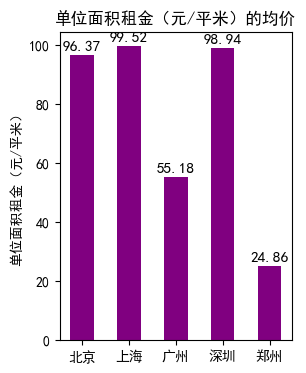

In [138]:
plt.figure(figsize=(3, 4))
plt.bar(result.keys(), [result[i]["单位面积租金（元/平米）的均价"] for i in result.keys()], width=0.5,color="purple")
for a,b in zip(result.keys(), [result[i]["单位面积租金（元/平米）的均价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("单位面积租金（元/平米）")
plt.title("单位面积租金（元/平米）的均价")


Text(0.5, 1.0, '人均收入')

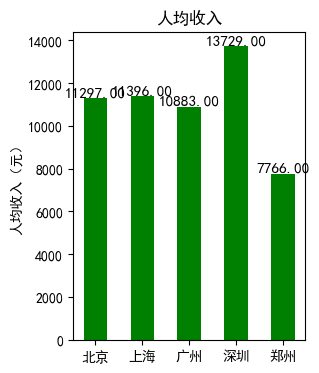

In [139]:
#绘制一下人均收入的柱状图
income_list=[11297,11396,10883,13729,7766]
plt.figure(figsize=(3, 4))
plt.bar(result.keys(), income_list, width=0.5,color="green")
for a,b in zip(result.keys(), income_list):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylabel("人均收入（元）")
plt.title("人均收入")


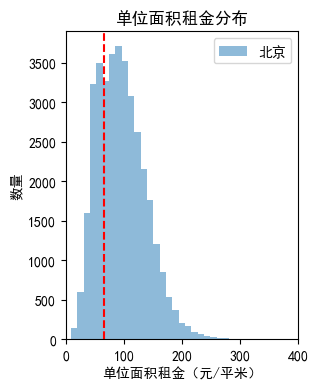

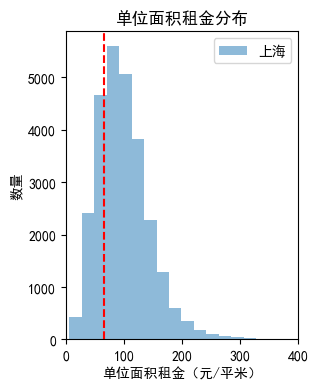

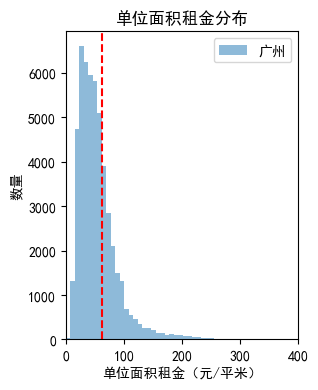

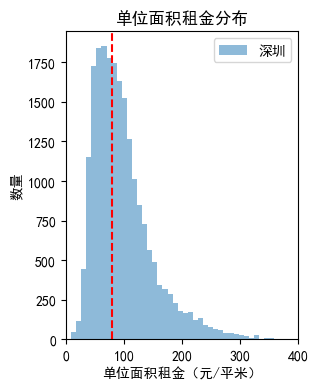

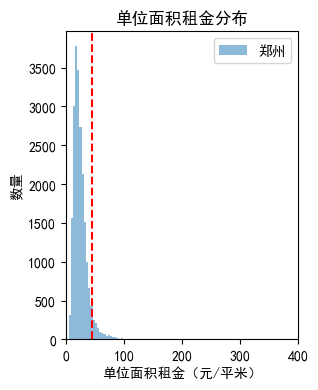

In [140]:

income_list=[11297,11396,10883,13729,7766]
for i in range(len(citynamelist)):
    plt.figure(figsize=(3, 4))
    plt.hist(df_list[i]['price']/df_list[i]['area'].astype('float64'),bins=100,label=citynamelist_chinese[i],alpha=0.5)
    #调整横坐标范围
    plt.xlim(0,400)
    #再根据输入画一条线
    plt.axvline(x=0.24*income_list[i]/41.76,ls="--",c="red")
    #在右侧加入线的名字
    plt.title("单位面积租金分布")
    plt.xlabel("单位面积租金（元/平米）")
    plt.ylabel("数量")
    plt.legend()
    plt.show()

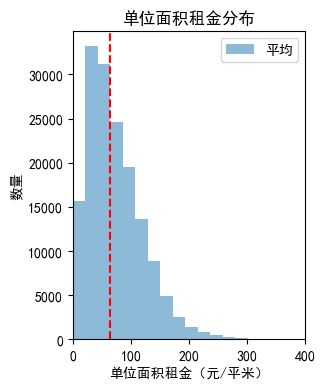

In [141]:
df_all=pd.concat(df_list)
plt.figure(figsize=(3, 4))
plt.hist(df_all['price']/df_all['area'].astype('float64'),bins=100,label="平均",alpha=0.5)
#调整横坐标范围
plt.xlim(0,400)
#再根据输入画一条线
plt.axvline(x=0.24*11014/41.76,ls="--",c="red")
#在右侧加入线的名字
plt.title("单位面积租金分布")
plt.xlabel("单位面积租金（元/平米）")
plt.ylabel("数量")
plt.legend()
plt.show()

In [142]:
#4.     比较5个城市一居、二居、三居的情况，包含均价、最高价、最低价、中位数等信息，采用合适的图或表形式进行展示。
def get_house_type(x):
    #12室，1室中提取室数
    try:
        return int(x.replace("居","").split("室")[0])
    except:
        return 1
    


In [143]:
#4.     比较5个城市一居、二居、三居的情况，包含均价、最高价、最低价、中位数等信息，采用合适的图或表形式进行展示。
for i in range(len(citynamelist)):
    df_list[i]["house_type"]=df_list[i]["house_type"].apply(get_house_type)
    df_list[i]=df_list[i].drop(df_list[i][df_list[i]["house_type"]>3].index)
    df_list[i]=df_list[i].drop(df_list[i][df_list[i]["house_type"]<1].index)
    df_list[i]=df_list[i].dropna()
    df_list[i]=df_list[i].drop_duplicates()
    df_list[i]=df_list[i].reset_index(drop=True)
    print(citynamelist_chinese[i]+"的数据数量为：",len(df_list[i]))


北京的数据数量为： 34705
上海的数据数量为： 25714
广州的数据数量为： 42807
深圳的数据数量为： 16220
郑州的数据数量为： 19014


In [144]:

for i in range(len(citynamelist)):
    result[citynamelist_chinese[i]]["一居"]=df_list[i][df_list[i]["house_type"]==1]
    result[citynamelist_chinese[i]]["二居"]=df_list[i][df_list[i]["house_type"]==2]
    result[citynamelist_chinese[i]]["三居"]=df_list[i][df_list[i]["house_type"]==3]
    result[citynamelist_chinese[i]]["一居租金的均价"]=result[citynamelist_chinese[i]]["一居"]['price'].mean()
    result[citynamelist_chinese[i]]["一居租金的最高价"]=result[citynamelist_chinese[i]]["一居"]['price'].max()
    result[citynamelist_chinese[i]]["一居租金的最低价"]=result[citynamelist_chinese[i]]["一居"]['price'].min()
    result[citynamelist_chinese[i]]["一居租金的中位数"]=result[citynamelist_chinese[i]]["一居"]['price'].median()
    result[citynamelist_chinese[i]]["二居租金的均价"]=result[citynamelist_chinese[i]]["二居"]['price'].mean()
    result[citynamelist_chinese[i]]["二居租金的最高价"]=result[citynamelist_chinese[i]]["二居"]['price'].max()
    result[citynamelist_chinese[i]]["二居租金的最低价"]=result[citynamelist_chinese[i]]["二居"]['price'].min()
    result[citynamelist_chinese[i]]["二居租金的中位数"]=result[citynamelist_chinese[i]]["二居"]['price'].median()
    result[citynamelist_chinese[i]]["三居租金的均价"]=result[citynamelist_chinese[i]]["三居"]['price'].mean()
    result[citynamelist_chinese[i]]["三居租金的最高价"]=result[citynamelist_chinese[i]]["三居"]['price'].max()
    result[citynamelist_chinese[i]]["三居租金的最低价"]=result[citynamelist_chinese[i]]["三居"]['price'].min()
    result[citynamelist_chinese[i]]["三居租金的中位数"]=result[citynamelist_chinese[i]]["三居"]['price'].median()
    result[citynamelist_chinese[i]]["一居单位面积租金（元/平米）的均价"]=(result[citynamelist_chinese[i]]["一居"]['price']/result[citynamelist_chinese[i]]["一居"]['area'].astype('float64')).mean()
    result[citynamelist_chinese[i]]["一居单位面积租金（元/平米）的最高价"]=(result[citynamelist_chinese[i]]["一居"]['price']/result[citynamelist_chinese[i]]["一居"]['area'].astype('float64')).max()
    result[citynamelist_chinese[i]]["一居单位面积租金（元/平米）的最低价"]=(result[citynamelist_chinese[i]]["一居"]['price']/result[citynamelist_chinese[i]]["一居"]['area'].astype('float64')).min()
    result[citynamelist_chinese[i]]["一居单位面积租金（元/平米）的中位数"]=(result[citynamelist_chinese[i]]["一居"]['price']/result[citynamelist_chinese[i]]["一居"]['area'].astype('float64')).median()
    result[citynamelist_chinese[i]]["二居单位面积租金（元/平米）的均价"]=(result[citynamelist_chinese[i]]["二居"]['price']/result[citynamelist_chinese[i]]["二居"]['area'].astype('float64')).mean()
    result[citynamelist_chinese[i]]["二居单位面积租金（元/平米）的最高价"]=(result[citynamelist_chinese[i]]["二居"]['price']/result[citynamelist_chinese[i]]["二居"]['area'].astype('float64')).max()
    result[citynamelist_chinese[i]]["二居单位面积租金（元/平米）的最低价"]=(result[citynamelist_chinese[i]]["二居"]['price']/result[citynamelist_chinese[i]]["二居"]['area'].astype('float64')).min()
    result[citynamelist_chinese[i]]["二居单位面积租金（元/平米）的中位数"]=(result[citynamelist_chinese[i]]["二居"]['price']/result[citynamelist_chinese[i]]["二居"]['area'].astype('float64')).median()
    result[citynamelist_chinese[i]]["三居单位面积租金（元/平米）的均价"]=(result[citynamelist_chinese[i]]["三居"]['price']/result[citynamelist_chinese[i]]["三居"]['area'].astype('float64')).mean()
    result[citynamelist_chinese[i]]["三居单位面积租金（元/平米）的最高价"]=(result[citynamelist_chinese[i]]["三居"]['price']/result[citynamelist_chinese[i]]["三居"]['area'].astype('float64')).max()
    result[citynamelist_chinese[i]]["三居单位面积租金（元/平米）的最低价"]=(result[citynamelist_chinese[i]]["三居"]['price']/result[citynamelist_chinese[i]]["三居"]['area'].astype('float64')).min()
    result[citynamelist_chinese[i]]["三居单位面积租金（元/平米）的中位数"]=(result[citynamelist_chinese[i]]["三居"]['price']/result[citynamelist_chinese[i]]["三居"]['area'].astype('float64')).median()
print(result)

{'北京': {'租金的均价': 8213.792559899117, '租金的最高价': 216000, '租金的最低价': 500, '租金的中位数': 6390.0, '单位面积租金（元/平米）的均价': 96.37435170029163, '单位面积租金（元/平米）的最高价': 1098.265895953757, '单位面积租金（元/平米）的最低价': 8.983992159425025, '单位面积租金（元/平米）的中位数': 91.93662453802983, '一居':       name_chinese block  house_type direct    area  price
0               北京   安定门           1      南   39.00   6000
3               北京   安定门           1      南   43.39   5900
4               北京   安定门           1      南   37.64   5800
5               北京   安定门           1      北   36.31   5300
9               北京   安定门           1      南   38.27   6000
...            ...   ...         ...    ...     ...    ...
34653           北京  密云其它           1    南/北   44.63   2000
34661           北京  密云其它           1    南/北   70.14   2200
34666           北京  十里堡镇           1      南  217.16   6000
34671           北京  溪翁庄镇           1    南/北   59.78   1300
34689           北京  溪翁庄镇           1    南/北   48.64   1300

[9911 rows x 6 columns], '二居':       name_c

Text(0.5, 1.0, '租金均价')

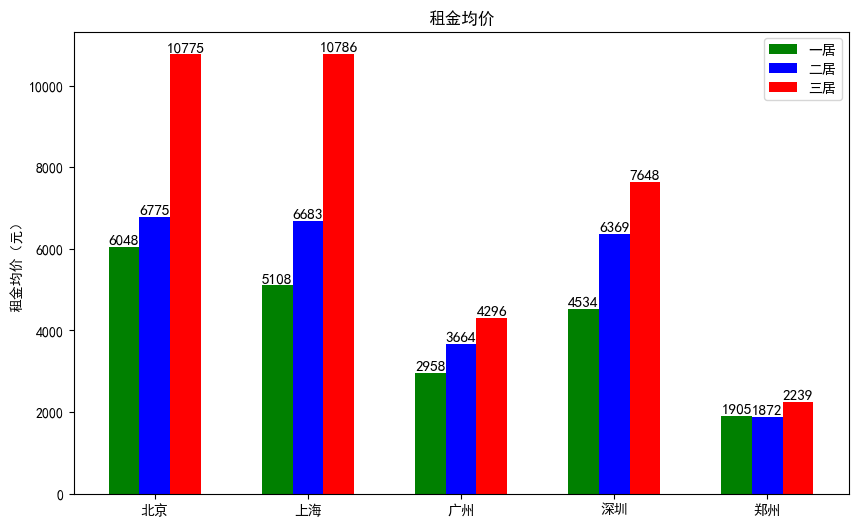

In [145]:
#在一张图中输出五个城市一居、二居、三居的租金均价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居租金的均价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的均价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的均价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居租金的均价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的均价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的均价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("租金均价（元）")
plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("租金均价")



Text(0.5, 1.0, '租金最高价')

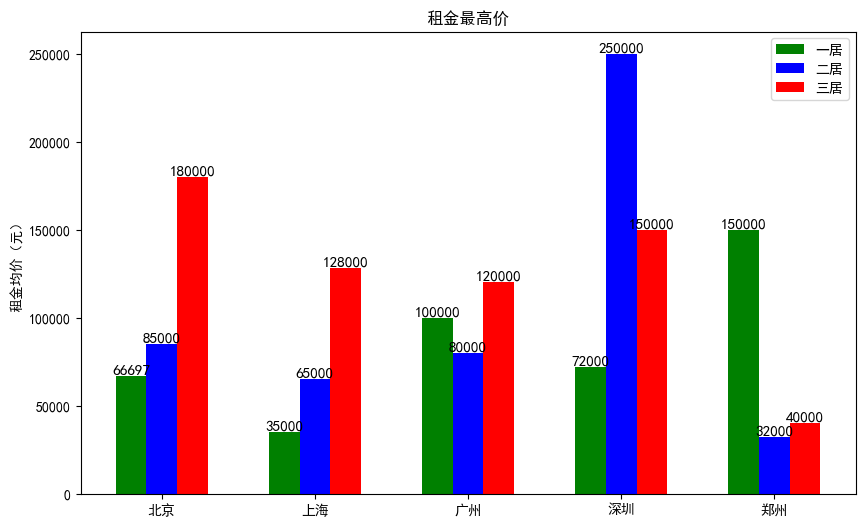

In [146]:

    
#在一张图中输出五个城市一居、二居、三居的租金均价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居租金的最高价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的最高价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的最高价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居租金的最高价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的最高价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的最高价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("租金均价（元）")
plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("租金最高价")



Text(0.5, 1.0, '租金最低价')

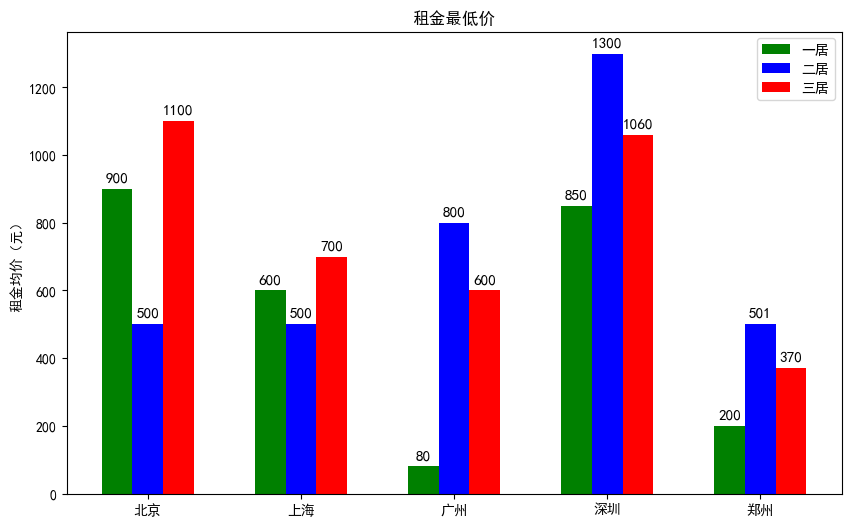

In [147]:
#在一张图中输出五个城市一居、二居、三居的租金均价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居租金的最低价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的最低价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的最低价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居租金的最低价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居租金的最低价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居租金的最低价"] for i in result.keys()]):
    plt.text(a, b+15, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("租金均价（元）")
plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("租金最低价")


Text(0.5, 1.0, '单位面积租金均价')

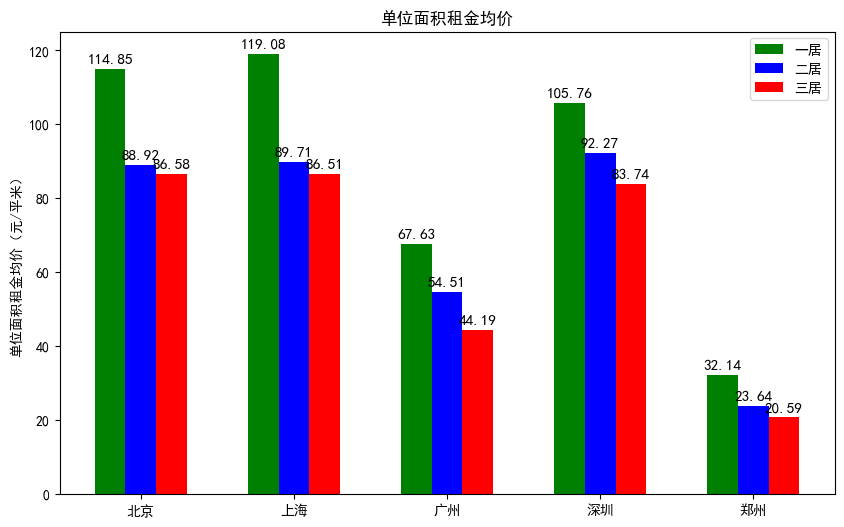

In [148]:

#在一张图中输出五个城市一居、二居、三居单位面积的租金均价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的均价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的均价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的均价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值

for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的均价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的均价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的均价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("单位面积租金均价（元/平米）")
plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("单位面积租金均价")





Text(0.5, 1.0, '单位面积租金最高价')

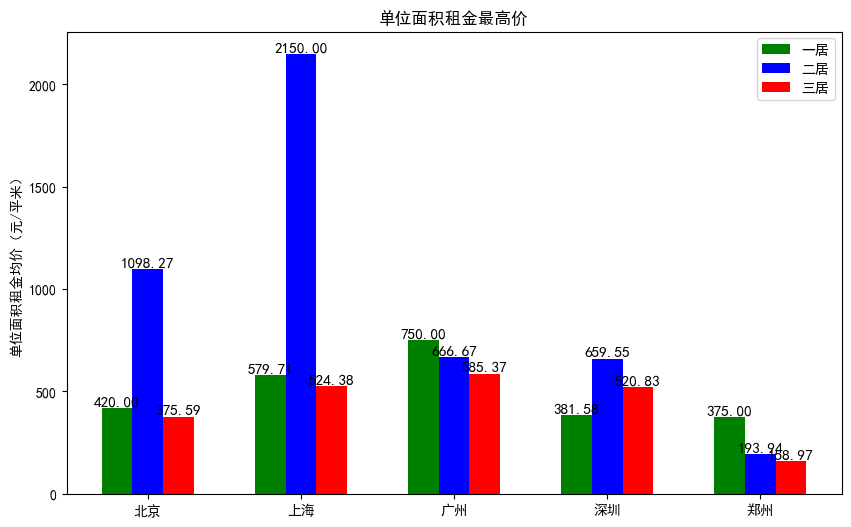

In [149]:

#在一张图中输出五个城市一居、二居、三居单位面积的租金均价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的最高价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的最高价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的最高价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的最高价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的最高价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的最高价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("单位面积租金均价（元/平米）")

plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("单位面积租金最高价")

Text(0.5, 1.0, '单位面积租金最低价')

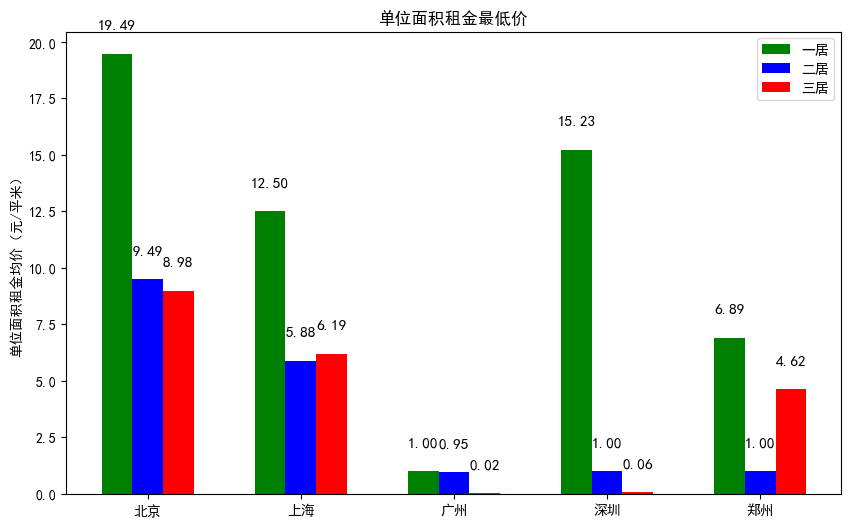

In [150]:
#在一张图中输出五个城市一居、二居、三居单位面积的租金最低价，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的最低价"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的最低价"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的最低价"] for i in result.keys()], width=0.2,color="red",label="三居")
#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的最低价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的最低价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的最低价"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("单位面积租金均价（元/平米）")

plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("单位面积租金最低价")

Text(0.5, 1.0, '单位面积租金中位数')

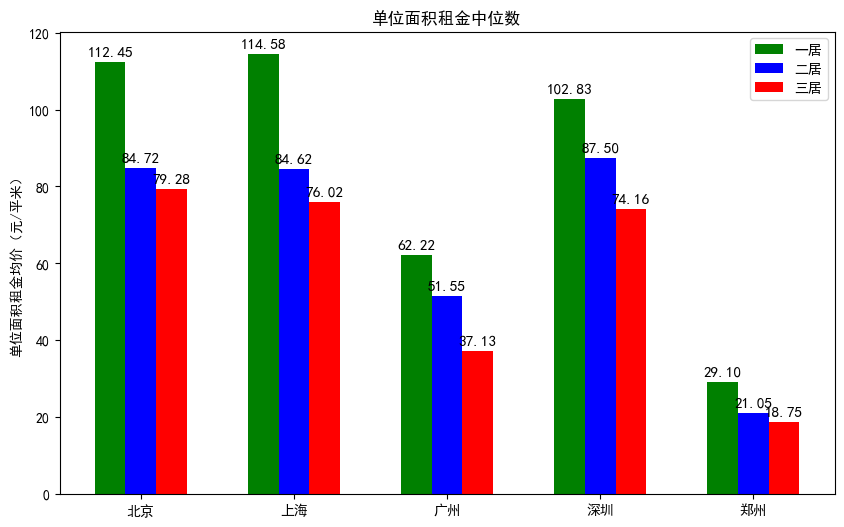

In [151]:

#在一张图中输出五个城市一居、二居、三居单位面积的租金中位数，间隔设置为0
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的中位数"] for i in result.keys()], width=0.2,color="green",label="一居")
plt.bar(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的中位数"] for i in result.keys()], width=0.2,color="blue",label="二居")
plt.bar(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的中位数"] for i in result.keys()], width=0.2,color="red",label="三居")

#加上柱体的值
for a,b in zip(np.arange(len(citynamelist)), [result[i]["一居单位面积租金（元/平米）的中位数"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.2, [result[i]["二居单位面积租金（元/平米）的中位数"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(np.arange(len(citynamelist))+0.4, [result[i]["三居单位面积租金（元/平米）的中位数"] for i in result.keys()]):
    plt.text(a, b+1, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
#加上单位
plt.ylabel("单位面积租金均价（元/平米）")

plt.xticks(np.arange(len(citynamelist))+0.2,citynamelist_chinese)
plt.legend()
plt.title("单位面积租金中位数")